## Mid data - test inference results

In [100]:
import pandas as pd

df = pd.read_csv('output_preds/data_mid_test.csv')
df = df.iloc[:, 3:]
df.head(4)

,TweetID,AuthorID,AuthorName,Tweets,arxiv_link,Abstract,Title,Thread_length,Tweets_coarse,year,month,tweet_length,Generated_Tweets,BASELINE
0,1494147269796540418,1128095824473276418,Kai Shu,Identifying disinformation in a new domain is ...,https://arxiv.org/abs/2202.08159,With social media being a major force in infor...,Domain Adaptive Fake News Detection via Reinfo...,1,['Identifying disinformation in a new domain i...,22,2,260,new paper on #FakeNewsDetection with auxiliary...,effective fake news detection is a non-trivial...
1,1240845694421721089,92182169,Ian Manchester,New paper (with Ray Wang and Roland Toth) intr...,https://arxiv.org/abs/2003.08513,This paper proposes a novel approach to nonlin...,Virtual Control Contraction Metrics: Convex No...,1,['New paper (with Ray Wang and Roland Toth) in...,20,3,262,paper on nonlinear state-feedback control with...,the paper proposes a novel approach to nonline...
2,1156466481833676800,22392129,Jasmijn Bastings,We released Joey NMT 🐨 a minimalist NMT toolki...,https://arxiv.org/abs/1907.12484,"We present Joey NMT, a minimalist neural machi...",Joey NMT: A Minimalist NMT Toolkit for Novices,2,['We released Joey NMT 🐨 a minimalist NMT tool...,19,7,256,"out our new paper ""Joey NMT: A Minimalist Neur...",Joey NMT is a neural machine translation toolk...
3,1417851297764626432,356676252,John Regan,"On the @arxiv today (<LINK>) @Fabio_Pacucci , ...",https://arxiv.org/abs/2107.09069,The population of massive black holes (MBHs) i...,The Active Fraction of Massive Black Holes in ...,3,['On the @arxiv today (<LINK>) @Fabio_Pacucci...,21,7,594,paper on the arXiv today! We develop a theoret...,the population of massive black holes (MBHs) i...


In [97]:
from datasets import load_metric

rouge_score = load_metric("rouge")

In [98]:
score_list_gen_true = []
score_list_gen_base_true = []

score_list_gen_text = []
score_list_gen_base_text = []
score_list_true_text = []

for i in range(len(df)):
    label_example_gen = df['Generated_Tweets'][i]
    label_example_gen_base = df['BASELINE'][i]
    label_example_true = df['Tweets'][i]
    text_example = df['Abstract'][i]
    
    scores_gen_true = rouge_score.compute(predictions=[label_example_gen], references=[label_example_true])
    scores_gen_base_true = rouge_score.compute(predictions=[label_example_gen_base], references=[label_example_true])

    scores_gen_text = rouge_score.compute(predictions=[label_example_gen], references=[text_example])
    scores_gen_base_text = rouge_score.compute(predictions=[label_example_gen_base], references=[text_example])
    scores_true_text = rouge_score.compute(predictions=[label_example_true], references=[text_example])
    
    score_list_gen_true.append(scores_gen_true)
    score_list_gen_base_true.append(scores_gen_base_true)

    score_list_gen_text.append(scores_gen_text)
    score_list_gen_base_text.append(scores_gen_base_text)
    score_list_true_text.append(scores_true_text)

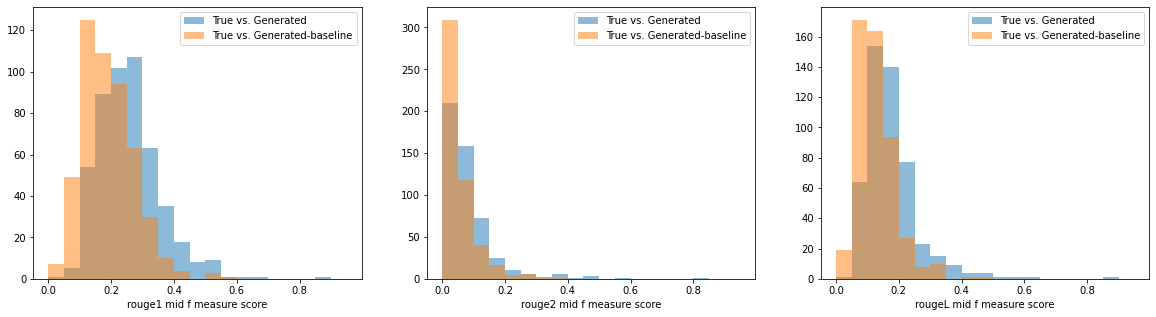

In [99]:
import matplotlib.pyplot as plt
import numpy as np

def ROUGE_hist(type_rouge, axes1, axes2, bins=20):
    rouge1_mid_fmeasure_gen_true = [score_list_gen_true[i][type_rouge].mid.fmeasure for i in range(len(score_list_gen_true))]
    rouge1_mid_fmeasure_gen_base_true = [score_list_gen_base_true[i][type_rouge].mid.fmeasure for i in range(len(score_list_gen_base_true))]

    rouge1_mid_fmeasure_gen_text = [score_list_gen_text[i][type_rouge].mid.fmeasure for i in range(len(score_list_gen_text))]
    rouge1_mid_fmeasure_gen_base_text = [score_list_gen_base_text[i][type_rouge].mid.fmeasure for i in range(len(score_list_gen_base_text))]
    rouge1_mid_fmeasure_true_text = [score_list_true_text[i][type_rouge].mid.fmeasure for i in range(len(score_list_true_text))]

    axes1.hist(rouge1_mid_fmeasure_gen_true, alpha=0.5, bins=bins)
    axes1.hist(rouge1_mid_fmeasure_gen_base_true, alpha=0.5, bins=bins)

    axes1.set_xlabel(type_rouge + ' mid f measure score')
    #axes1.set_ylabel('Tweets')
    #axes1.set_yscale("log")
    axes1.legend(['True vs. Generated','True vs. Generated-baseline'])

    if axes2 == None:
        return
    axes2.hist(rouge1_mid_fmeasure_gen_text, alpha=0.5, bins=bins)
    axes2.hist(rouge1_mid_fmeasure_gen_base_text, alpha=0.5, bins=bins)
    axes2.hist(rouge1_mid_fmeasure_true_text, alpha=0.5, bins=bins)

    #axes2.set_xlabel(type_rouge + ' mid f measure score')
    #axes2.set_ylabel('Tweets')
    #axes2.set_yscale("log")
    axes2.legend(['Generated vs. Input','Generated-baseline vs. Input','True vs. Input'])

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

ROUGE_hist('rouge1', axes[0], None, bins=np.arange(0, 1.0, 0.05))
ROUGE_hist('rouge2', axes[1], None, bins=np.arange(0, 1.0, 0.05))
ROUGE_hist('rougeL', axes[2], None, bins=np.arange(0, 1.0, 0.05))

fig.savefig('figures/rouge_hist.png',facecolor='white')

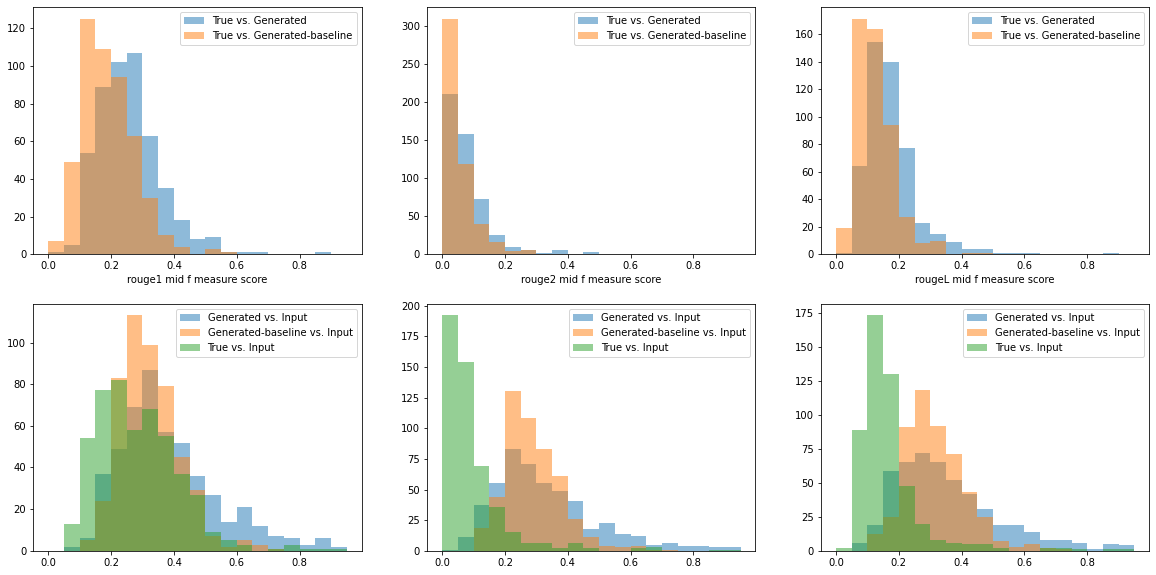

In [89]:
# it is also possible to add another line in the grid, re-purposing the ROUGE metric for comparison between text-to-be-summarized and the generated summary

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

ROUGE_hist('rouge1', axes[0, 0], axes[1, 0], bins=np.arange(0, 1.0, 0.05))
ROUGE_hist('rouge2', axes[0, 1], axes[1, 1], bins=np.arange(0, 1.0, 0.05))
ROUGE_hist('rougeL', axes[0, 2], axes[1, 2], bins=np.arange(0, 1.0, 0.05))

### Examples

In [68]:
# sample n rows from df
n = 3
df_examples = df.sample(n)

# run over df_examples
for i in range(n):
    print('ABSTRACT:                    ' + df_examples.iloc[i]['Abstract']+"\n")
    print('True Twitter Thread:         ' + df_examples.iloc[i]['Tweets']+"\n")
    print('Generated "Tweets":          ' + df_examples.iloc[i]['Generated_Tweets']+"\n")
    print('Generated Baseline Summary:  ' + df_examples.iloc[i]['BASELINE']+"\n --------------------------------------------------")



ABSTRACT:                    The scope of the project "A PSF-based Approach to TESS High Quality data Of Stellar clusters" (PATHOS) is the extraction and analysis of high-precision light curves of stars in stellar clusters and young associations for the identification of candidate exoplanets and variable stars. The cutting-edge tools used in this project allow us to measure the real flux of stars in dense fields, minimising the effects due to contamination by neighbour sources. We extracted about 200 000 light curves of stars in 645 open clusters located in the southern ecliptic hemisphere and observed by TESS during the first year of its mission. We searched for transiting signals and we found 33 objects of interest, 11 of them are strong candidate exoplanets. Because of the limited S/N, we did not find any Earth or super-Earth. We identified two Neptune-size planets orbiting stars with $R_{\star}<1.5\,R_{\odot}$, implying a frequency $f_{\star}=1.34 \pm 0.95\,\%$, consistent with the

## External papers - my papers

In [101]:
import pandas as pd
df_my_papers = pd.read_csv('output_preds/my_data.csv')

In [102]:
# sample n rows from df
n = 3
df_examples = df_my_papers.sample(n)

# run over df_examples
for i in range(n):
    print('ABSTRACT:                    ' + df_examples.iloc[i]['Abstract']+"\n")
    print('Generated "Tweets":          ' + df_examples.iloc[i]['Generated_Tweets']+"\n")
    print('Generated Baseline Summary:  ' + df_examples.iloc[i]['BASELINE']+"\n --------------------------------------------------")


ABSTRACT:                    We study the ratio of neutrino-proton elastic scattering to inverse beta decay event counts, measurable in a scintillation detector like JUNO, as a key observable for identifying the explosion mechanism of a galactic core-collapse supernova. If the supernova is not powered by the core but rather, e.g., by collapse-induced thermonuclear explosion, then a prolonged period of accretion-dominated neutrino luminosity is predicted. Using 1D numerical simulations, we show that the distinct resulting flavour composition of the neutrino burst can be tested in JUNO with high significance, overcoming theoretical uncertainties in the progenitor star profile and equation of state. 

Generated "Tweets":          paper on the arXiv today! We study the ratio of neutrino-proton elastic scattering to inverse beta decay event counts, measurable in a scintillation detector like JUNO, as a key observable for identifying the explosion mechanism of a galactic core-collapse supern